In [1]:
!pip install pandas scikit-learn xgboost

#### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Titanic dataset

In [3]:
data = pd.read_csv(r'F:\INTERNSHIPS\BHARAT INTERN\TASK 2[Titanic Classification]\Titanic Dataset/train.csv')

#### Reading the dataset

In [4]:
# First 5 rows of dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Last five rows of dataset
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Number of rows and columns of the dataset
data.shape

(891, 12)

In [8]:
# Column names of the dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# Descriptive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Data preprocessing

In [10]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.dropna(inplace=True)  # Remove rows with missing values

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Encode categorical features

In [12]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


#### Feature engineering

In [14]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data['IsAlone'] = np.where(data['FamilySize'] == 0, 1, 0)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,2,1,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,1
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,1


#### Define features and target variable

In [16]:
X = data.drop('Survived', axis=1)
y = data['Survived']

#### Split the data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("_"*80)
print("X_train :")
print("_"*80)
print(X_train)
print("_"*80)

________________________________________________________________________________
X_train :
________________________________________________________________________________
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  IsAlone
472       2    0  33.0      1      2  27.7500         2           3        0
432       2    0  42.0      1      0  26.0000         2           1        0
666       2    1  25.0      0      0  13.0000         2           0        1
30        1    1  40.0      0      0  27.7208         0           0        1
291       1    0  19.0      1      0  91.0792         0           1        0
..      ...  ...   ...    ...    ...      ...       ...         ...      ...
93        3    1  26.0      1      2  20.5750         2           3        0
135       2    1  23.0      0      0  15.0458         0           0        1
338       3    1  45.0      0      0   8.0500         2           0        1
549       2    1   8.0      1      1  36.7500         2   

In [19]:
print("_"*80)
print("X_test :")
print("_"*80)
print(X_test)
print("_"*80)

________________________________________________________________________________
X_test :
________________________________________________________________________________
     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  FamilySize  IsAlone
641       1    0  24.0      0      0   69.3000         0           0        1
496       1    0  54.0      1      0   78.2667         0           1        0
262       1    1  52.0      1      1   79.6500         2           2        0
311       1    0  18.0      2      2  262.3750         0           4        0
551       2    1  27.0      0      0   26.0000         2           0        1
..      ...  ...   ...    ...    ...       ...       ...         ...      ...
362       3    0  45.0      0      1   14.4542         0           1        0
56        2    0  21.0      0      0   10.5000         2           0        1
137       1    1  37.0      1      0   53.1000         2           1        0
651       2    0  18.0      0      1   23.0000   

In [20]:
print("_"*80)
print("y_train :")
print("_"*80)
print(y_train)
print("_"*80)

________________________________________________________________________________
y_train :
________________________________________________________________________________
472    1
432    1
666    0
30     0
291    1
      ..
93     0
135    0
338    1
549    1
131    0
Name: Survived, Length: 569, dtype: int64
________________________________________________________________________________


In [21]:
print("_"*80)
print("y_test :")
print("_"*80)
print(y_test)
print("_"*80)

________________________________________________________________________________
y_test :
________________________________________________________________________________
641    1
496    1
262    0
311    1
551    0
      ..
362    0
56     1
137    0
651    1
74     1
Name: Survived, Length: 143, dtype: int64
________________________________________________________________________________


#### Standardize numerical features

In [22]:
scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#### Train a Random Forest classifier with hyperparameter tuning

In [23]:
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

#### Train an XGBoost classifier with hyperparameter tuning

In [24]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

#### Make predictions

In [25]:
y_pred_rf = best_rf_model.predict(X_test)
y_pred_xgb = best_xgb_model.predict(X_test)

#### Evaluate the models

In [26]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("_"*50)
print(f'\tRandom Forest Accuracy: {accuracy_rf:.2f}')
print("_"*50)

__________________________________________________
	Random Forest Accuracy: 0.78
__________________________________________________


In [27]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("_"*50)
print(f'\tXGBoost Accuracy: {accuracy_xgb:.2f}')
print("_"*50)

__________________________________________________
	XGBoost Accuracy: 0.81
__________________________________________________


### **Visualisations**

In [28]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

#### Countplot for passenger class (Pclass)

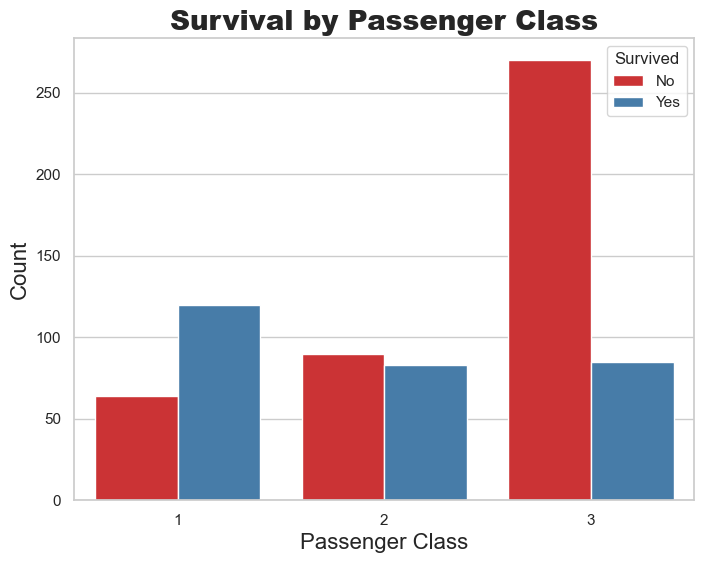

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived', palette='Set1')
plt.title("Survival by Passenger Class",fontsize=20,fontweight="black")
plt.xlabel("Passenger Class",size=16)
plt.ylabel("Count",size=16)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

#### Box plot for fare by passenger class

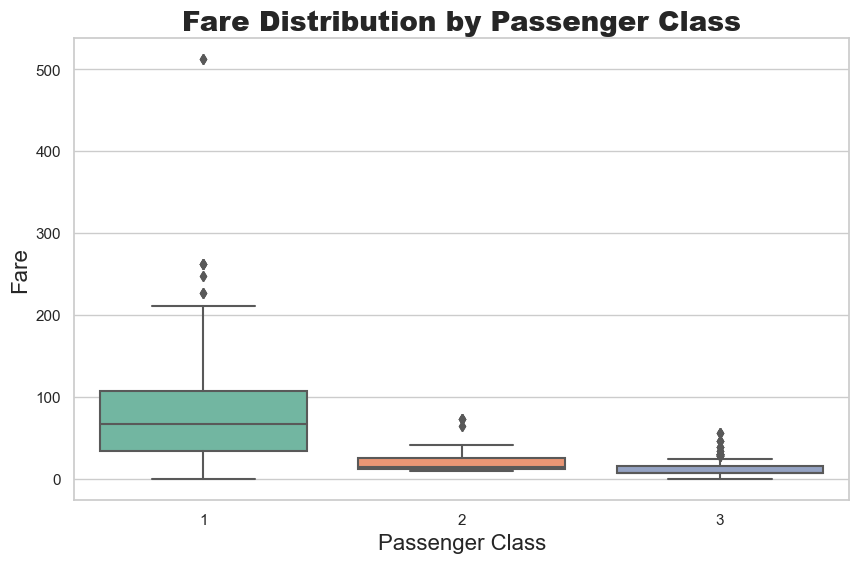

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Pclass', y='Fare', palette='Set2')
plt.title("Fare Distribution by Passenger Class",fontsize=20,fontweight="black")
plt.xlabel("Passenger Class",size=16)
plt.ylabel("Fare",size=16)
plt.show()

#### Distribution of passenger ages

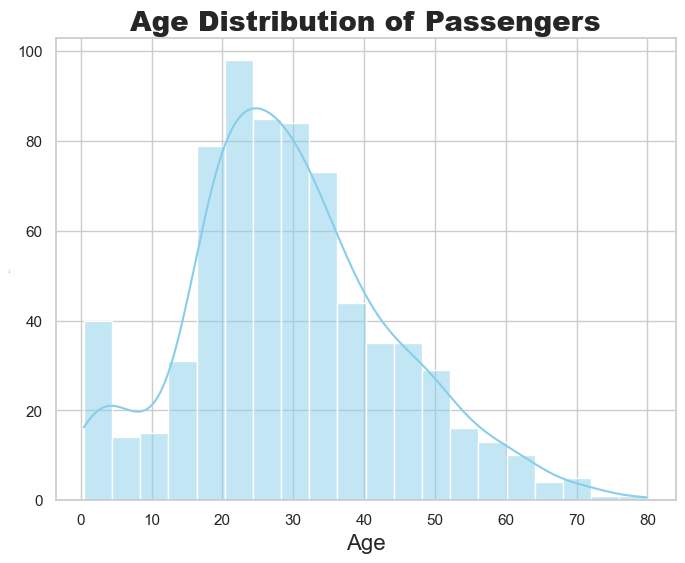

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', kde=True, color='skyblue')
plt.title("Age Distribution of Passengers",fontsize=20,fontweight="black")
plt.xlabel("Age",size=16)
plt.ylabel("Count",size=-16)
plt.show()

#### Correlation heatmap

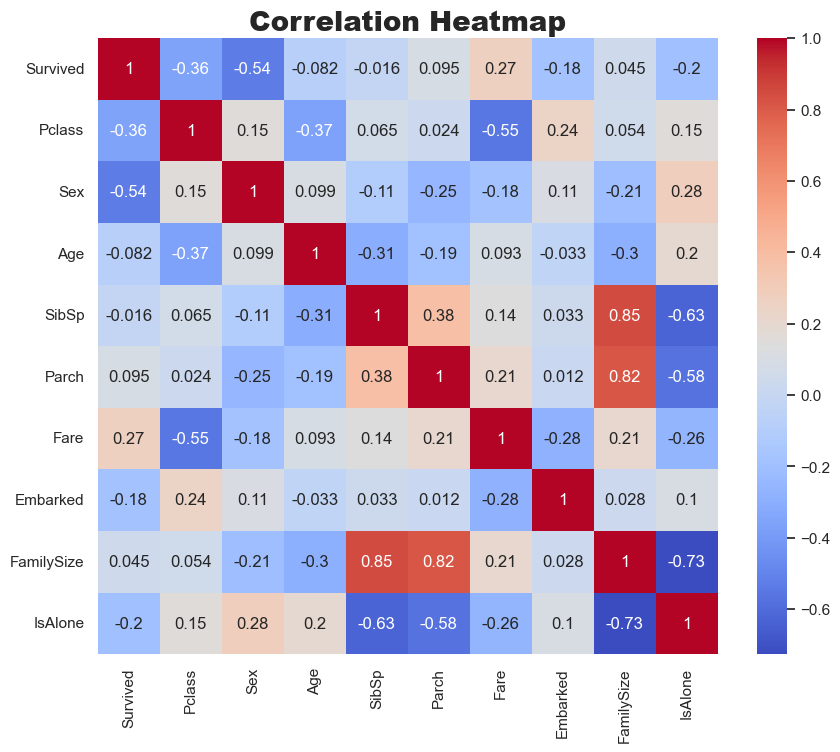

In [32]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap",fontsize=20,fontweight="black")
plt.show()

#### Countplot for gender (Sex)

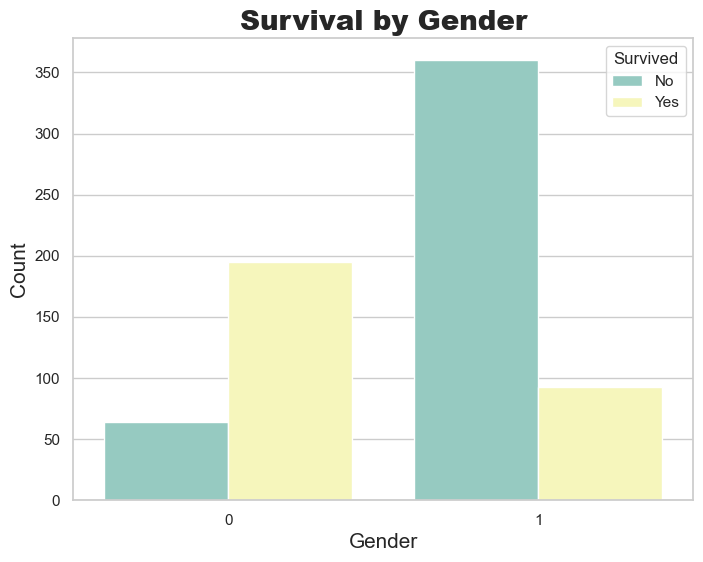

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived', palette='Set3')
plt.title("Survival by Gender",fontsize=20,fontweight="black")
plt.xlabel("Gender",size=15)
plt.ylabel("Count",size=15)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()